In [1]:
# Imports collected here
import sys, os
from time import sleep, time
import datetime
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import re
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Read the data
today = datetime.date.today()

#today = today - datetime.timedelta(days=1) #Possibility to use yesterdays data
today_str = str(today)

ROOT_DIR = os.path.dirname(os.path.abspath(''))
csv_path = os.path.join(os.path.sep, ROOT_DIR + '/JodaAIPlatformEnv/resultfiles'+ os.sep +"apartments" + today_str + ".csv")

df_og = pd.read_csv(csv_path, sep=";")

In [3]:
# Create working copy from the dataframe
df = df_og

In [4]:
# Strip other characters from numerical data which are strings at the moment and convert stripped strings to numerical values

numerical_column_list = [
    'Myyntihinta',
    'Velaton hinta', 
    'Pinta-ala', 
    'Neliöhinta',
    'Rahoitusvastike',
    'Hoitovastike',
    'Yhtiövastike',
    'Huoneet'
]

for column in numerical_column_list:
    df[column] = df[column].fillna(0)
    df[column] = df[column].astype(str)
    df[column] = df[column].map(lambda x: re.sub('[^0-9,.]', '', x))
    df[column] = df[column].str.replace(',','.')
    df[column] = df[column].astype(float)

In [5]:
# Switch possible columns to boolean

boolean_columns = [
    "Sauna",
    "Parveke",
    "Taloyhtiössä sauna"
]

for column in boolean_columns:
    df[column] = df[column].fillna(0)
    df[column] = df[column].astype(str)
    df[column] = df[column].replace("Kyllä", True)
    df[column] = df[column].replace(["Ei", 0, "0", "0.0"], False)

In [6]:
# Extracting floor data

df['Kerros'] = df['Kerros'].astype(str)
df['Kerros'] = df['Kerros'].replace(' ', '')
df['Kerroslukema'] = df['Kerros'].map(lambda x: x.split('/')[0])
df['Kerroslukema'] = df['Kerroslukema'].astype(float)


In [7]:
# Fixes for region data

df["Alue"] = df["Alue"].replace(['Hevanta', 'Länsi Hevanta', 'Länsi Hervanta'],'Hervanta')
df["Alue"] = df["Alue"].replace(['Ranta-tampella', '109'],'Ranta-Tampella')

display(df)

,Unnamed: 0,URL,Osoite,Alue,Myyntihinta,Velaton hinta,Pinta-ala,Neliöhinta,Rahoitusvastike,Hoitovastike,...,Parveke,Kylpyhuoneen varusteet,Sauna,Taloyhtiössä sauna,Säilytystilat,Näkymät,Tulevat remontit,Tehdyt remontit,Infoteksti,Kerroslukema
0,0,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Uudenkylänkatu 4 A, Hakametsä, Tampere",Hakametsä,160709.62,174000.0,53.5,3252.34,66.61,142.45,...,True,"Pesutilojen kuvaus: Wc-istuin, suihku, pesukon...",False,False,NaN,NaN,Hallituksen korjaussuunnitelman mukaan: 09/201...,1989 E-talon katon vesieristeiden uusinta. 199...,"HUOM!! Nyt vapautumassa kolmannen kerroksen, v...",3.0
1,1,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Yliopistonkatu 46 A, Keskusta, Tampere",Keskusta,168858.62,179900.0,46.5,3868.82,64.88,142.60,...,True,"Kylpyhuone, suihku, suihkuseinä, peilit, kaapi...",False,False,"Kaapistoja, kellarikomero",Ikkunat Yliopistonkadulle,Suunnitellut: Suunnitellut kunnossapito ja muu...,2008 vesikaton saneraus ja porrashuoneisden ku...,Nyt myynnissä loistopaikan koti Sorsapuiston l...,2.0
2,2,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tesomankatu 20 C, Tesoma, Tampere",Tesoma,91000.00,91000.0,58.5,1555.56,140.72,191.81,...,True,"Varustus: pesukoneliitäntä, lattialämmitys, wc...",False,False,"vaatehuone, kellarikomero",NaN,2019-2021 Alkuperäisten 6 kpl huippuimureiden ...,1992 Julkisivuelementtien saumaus 2001 Julkisi...,"Olen valoisa ylimmän kerroksen koti, joka etsi...",3.0
3,3,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Härmälänkatu 23 B, Rantaperkiö, Tampere",Rantaperkiö,75535.67,108000.0,48.0,2250.00,201.60,0.00,...,True,"Varustus: pesukoneliitäntä, wc-istuin, suihku,...",False,False,kellarikomero,NaN,- Huopakaton kunnon seuranta - Energiaselvitys...,"1993 lukot uusittu,1995 vesikatto,bitumi,rappu...",Rantaperkiössä Härmälän rajalla hyväkuntoinen ...,1.0
4,4,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Kuninkaankatu 33, Keskusta, Tampere",Keskusta,185000.00,185000.0,53.0,3490.57,0.00,127.20,...,True,NaN,False,False,NaN,NaN,Vesikatteen uusiminen sisältäen pelti- ja kerm...,"Hissien saneeraus 1989-91, Huopakaton korjaus ...",Ydinkeskustassa viidennen kerroksen kaksio.\nE...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,861,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tiporaitti 9 C, Santalahti, Tampere",Santalahti,61999.44,206500.0,44.0,4693.18,92.14,220.00,...,True,"Pesutilojen kuvaus: Varustus: suihkuseinä, pei...",False,False,"Kuvaus: Kellarivarasto, vaatehuone, kaapistot",NaN,NaN,NaN,MUUTTOVALMIS uuden Santalahden alueen ensimmäi...,3.0
862,862,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tiporaitti 9 C, Santalahti, Tampere",Santalahti,60198.35,199900.0,44.0,4543.18,89.08,202.40,...,True,"Pesutilojen kuvaus: Varustus: suihkuseinä, pei...",False,False,"Kuvaus: Kellarivarasto, vaatehuone, kaapistot",NaN,NaN,NaN,MUUTTOVALMIS uuden Santalahden alueen ensimmäi...,2.0
863,863,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Lintuhytinkatu 7 B 23, Lintuhytti, Tampere",Lintuhytti,53156.45,137000.0,39.0,3512.82,56.55,152.49,...,True,"Kylpyhuone, suihku, peili, allaskaappi, pesuko...",False,False,"Kaapistot, ulkovarasto","pihalle, kadulle",-,-,ENÄÄ KAKSI ASUNTOA MYYMÄTTÄ. KYSY VÄLITTÄJÄLTÄ...,2.0
864,864,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Runkokatu 6, Haukiluoma, Tampere",Haukiluoma,77148.35,85000.0,51.0,1666.67,27.54,207.06,...,True,"KPH: suihku, pesuallas, wc-istuin, peilikaappi...",False,False,"Kaapistot, vaatehuone. Kellarikerroksessa lisä...","pihalle, Avarat näkymät.",Hallituksen selvitys kunnossapitotarpeista vuo...,Yhtiössä on toteutettu seuraavat merkittävimmä...,Hyväpohjainen ja valoisa 3/4 kerroksen asunto....,3.0


In [ ]:
#Fix yhtiövastike as a sum of rahoitusvastike and hoitovastike

df["Yhtiövastike"] = df["Rahoitusvastike"] + df["Hoitovastike"]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              866 non-null    int64  
 1   URL                     866 non-null    object 
 2   Osoite                  866 non-null    object 
 3   Alue                    866 non-null    object 
 4   Myyntihinta             866 non-null    float64
 5   Velaton hinta           866 non-null    float64
 6   Pinta-ala               866 non-null    float64
 7   Neliöhinta              866 non-null    float64
 8   Rahoitusvastike         866 non-null    float64
 9   Hoitovastike            866 non-null    float64
 10  Yhtiövastike            866 non-null    float64
 11  Muut kustannukset       576 non-null    object 
 12  Kerros                  866 non-null    object 
 13  Huonekokoonpano         866 non-null    object 
 14  Huoneet                 866 non-null    fl

In [9]:
print(f'Asuntojen määrä datasetissä: {len(df)}')
print(f'Parametrien määrä datasetissä: {len(df.columns)} \n')

print(f'Datasetin kalleimman asunnon hinta {df["Velaton hinta"].max()} ({df.loc[df["Velaton hinta"].idxmax()]["URL"]})')
print(f'Datasetin halvimman asunnon hinta {df["Velaton hinta"].min()} ({df.loc[df["Velaton hinta"].idxmin()]["URL"]}) \n')

print(f'Datasetin kallein neliöhinta {df["Neliöhinta"].max()} ({df.loc[df["Neliöhinta"].idxmax()]["URL"]})')
print(f'Datasetin halvin neliöhinta {df["Neliöhinta"].min()} ({df.loc[df["Neliöhinta"].idxmin()]["URL"]}) \n')


Asuntojen määrä datasetissä: 866
Parametrien määrä datasetissä: 26 

Datasetin kalleimman asunnon hinta 708550.0 (https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15375887)
Datasetin halvimman asunnon hinta 32000.0 (https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15589039) 

Datasetin kallein neliöhinta 9717.67 (https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15553111)
Datasetin halvin neliöhinta 603.77 (https://asunnot.oikotie.fi/myytavat-asunnot/tampere/15589039) 



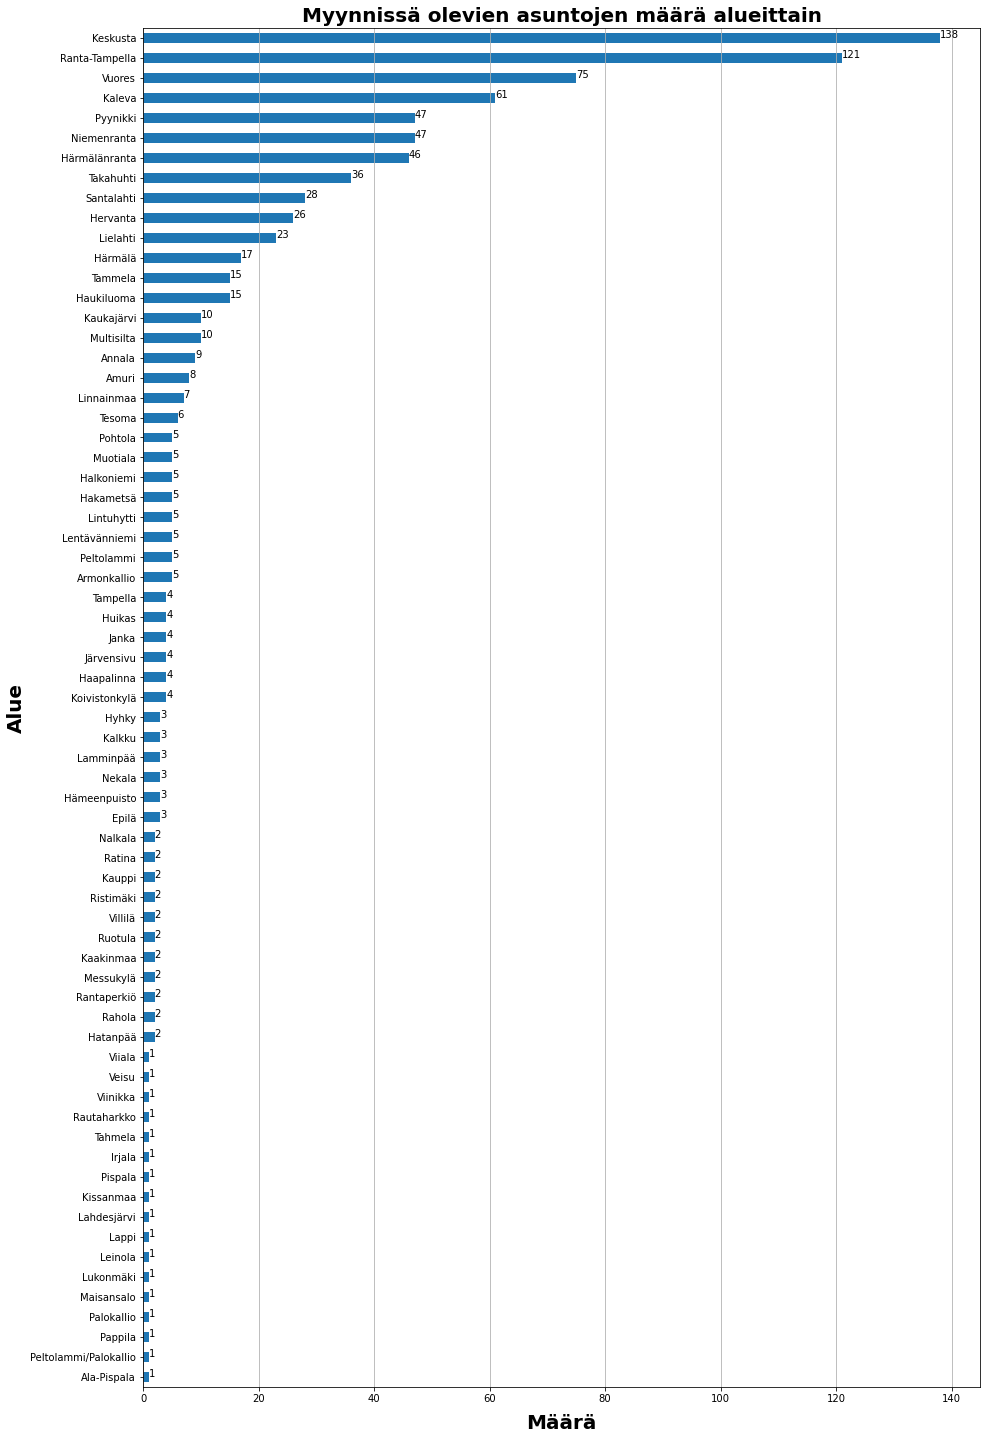

In [10]:
# Visualizr amount of apartments on sale

quantities = df.groupby("Alue").count()
quantities = quantities["Neliöhinta"].sort_values()

quantities_plot = quantities.plot(kind="barh", figsize=(15, 25))
quantities_plot.grid(axis='x')

for index, value in enumerate(quantities):
    label = str(value).split('.')[0]
    plt.text(value, index, label)
    
    
# Set x-axis label
quantities_plot.set_xlabel("Määrä", labelpad=10, weight='bold', size=20)

# Set y-axis label
quantities_plot.set_ylabel("Alue", weight='bold', size=20)

# Set plot title
plt.title('Myynnissä olevien asuntojen määrä alueittain', weight='bold', size=20)


plt.show()

68


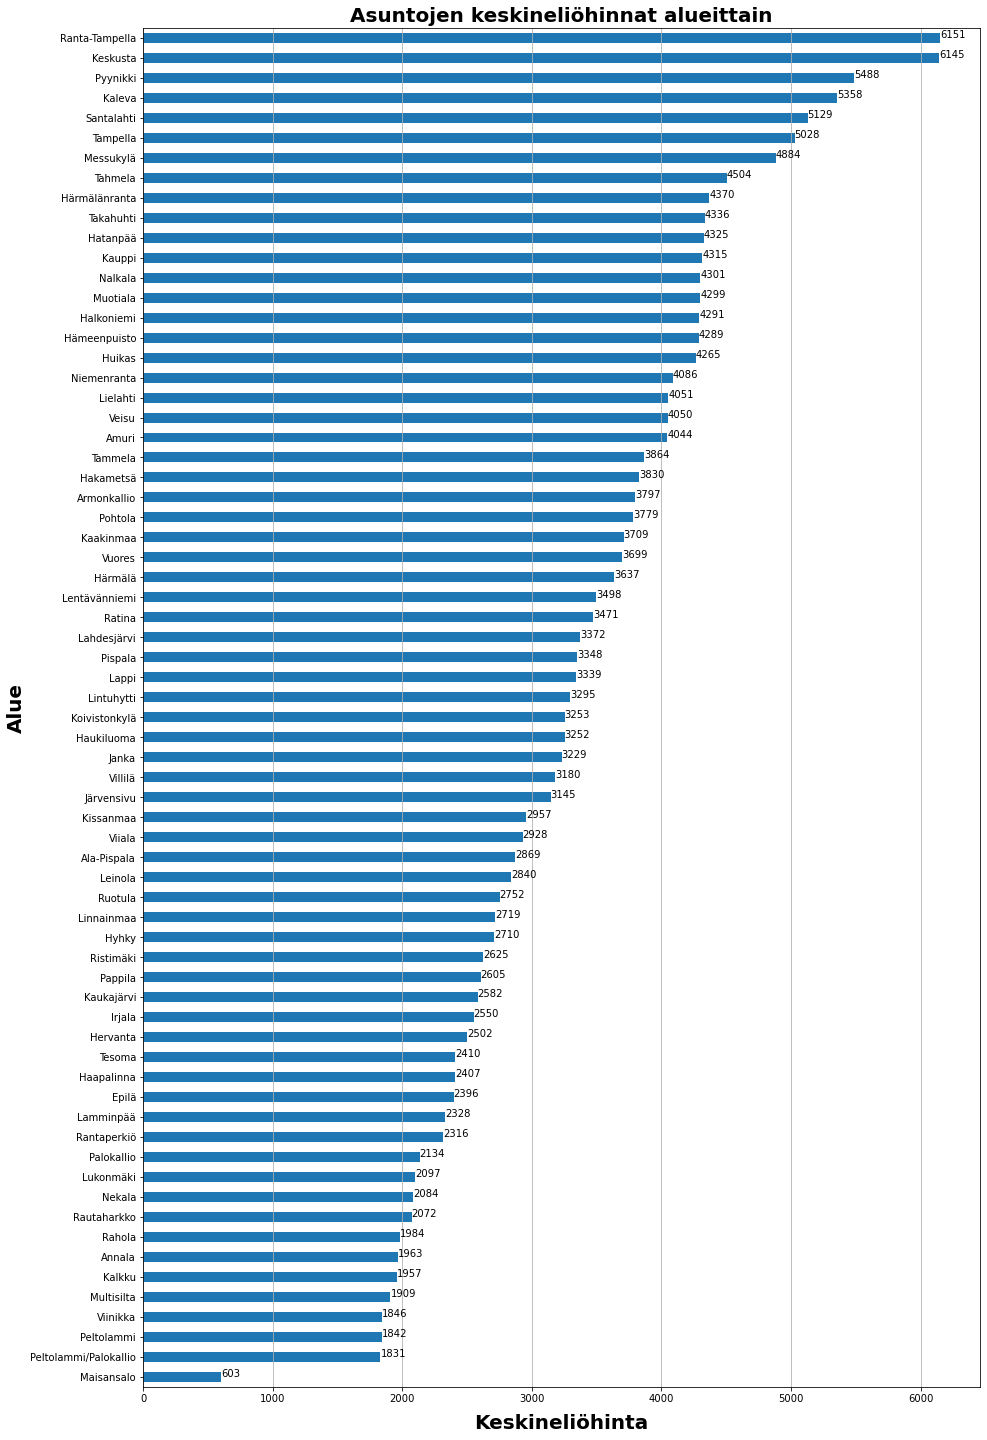

In [11]:
# Visualize average price per square meter in a region

avg_per_sq = df.groupby("Alue").mean()
avg_per_sq = avg_per_sq["Neliöhinta"].sort_values()
print(len(avg_per_sq))

avg_price_plot = avg_per_sq.plot(kind="barh", figsize=(15, 25))
avg_price_plot.grid(axis='x')

for index, value in enumerate(avg_per_sq):
    label = str(value).split('.')[0]
    plt.text(value, index, label)
    
    
# Set x-axis label
avg_price_plot.set_xlabel("Keskineliöhinta", labelpad=10, weight='bold', size=20)

# Set y-axis label
avg_price_plot.set_ylabel("Alue", weight='bold', size=20)

# Set plot title
plt.title('Asuntojen keskineliöhinnat alueittain', weight='bold', size=20)


plt.show()

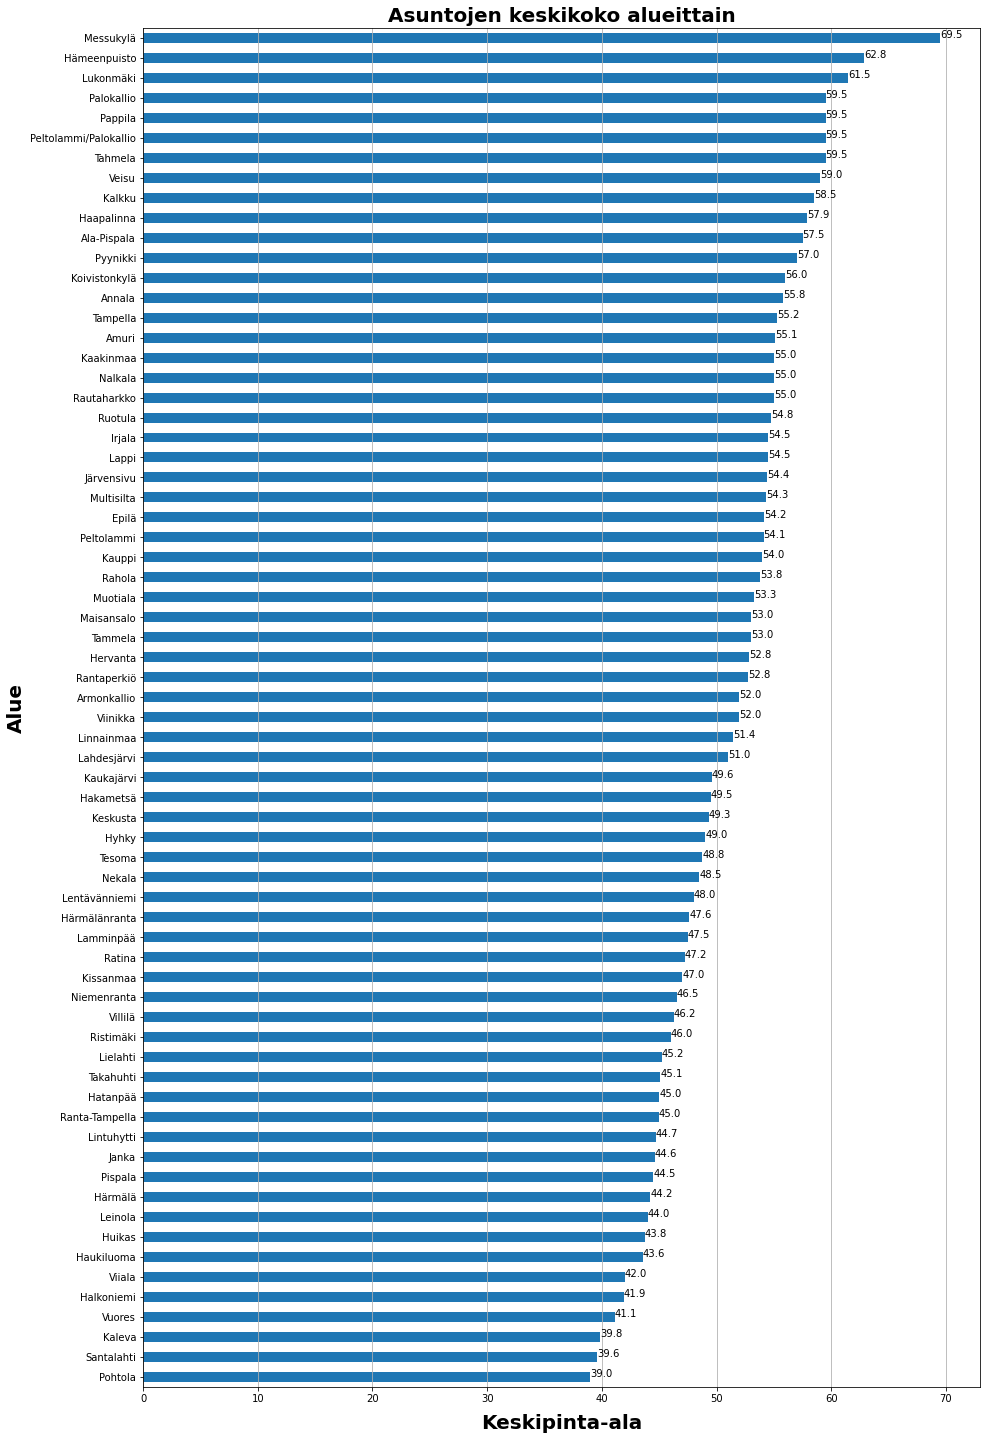

In [12]:
# Visualize average size of apartments in a region

avg_size = df.groupby("Alue").mean()
avg_size = avg_size["Pinta-ala"].sort_values()

size_plot = avg_size.plot(kind="barh", figsize=(15, 25))
size_plot.grid(axis='x')

for index, value in enumerate(avg_size):
    label = f"{value:.1f}"
    plt.text(value, index, label)
    
# Set x-axis label
size_plot.set_xlabel("Keskipinta-ala", labelpad=10, weight='bold', size=20)

# Set y-axis label
size_plot.set_ylabel("Alue", weight='bold', size=20)

# Set plot title
plt.title('Asuntojen keskikoko alueittain', weight='bold', size=20)

plt.show()

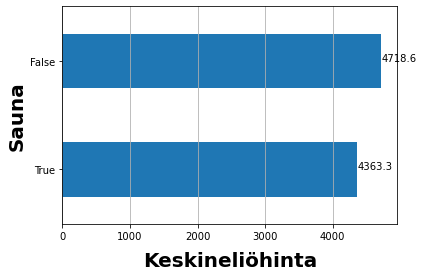

In [13]:
# Visualize average sq-price w/ and w/o sauna

sauna_avg_price = df.groupby("Sauna").mean()
sauna_avg_price = sauna_avg_price["Neliöhinta"].sort_values()

sauna_avg_price_plot = sauna_avg_price.plot(kind="barh")
sauna_avg_price_plot.grid(axis='x')

for index, value in enumerate(sauna_avg_price):
    label = f"{value:.1f}"
    plt.text(value, index, label)
    
# Set x-axis label
sauna_avg_price_plot.set_xlabel("Keskineliöhinta", labelpad=10, weight='bold', size=20)

# Set y-axis label
sauna_avg_price_plot.set_ylabel("Sauna", weight='bold', size=20)

plt.show()

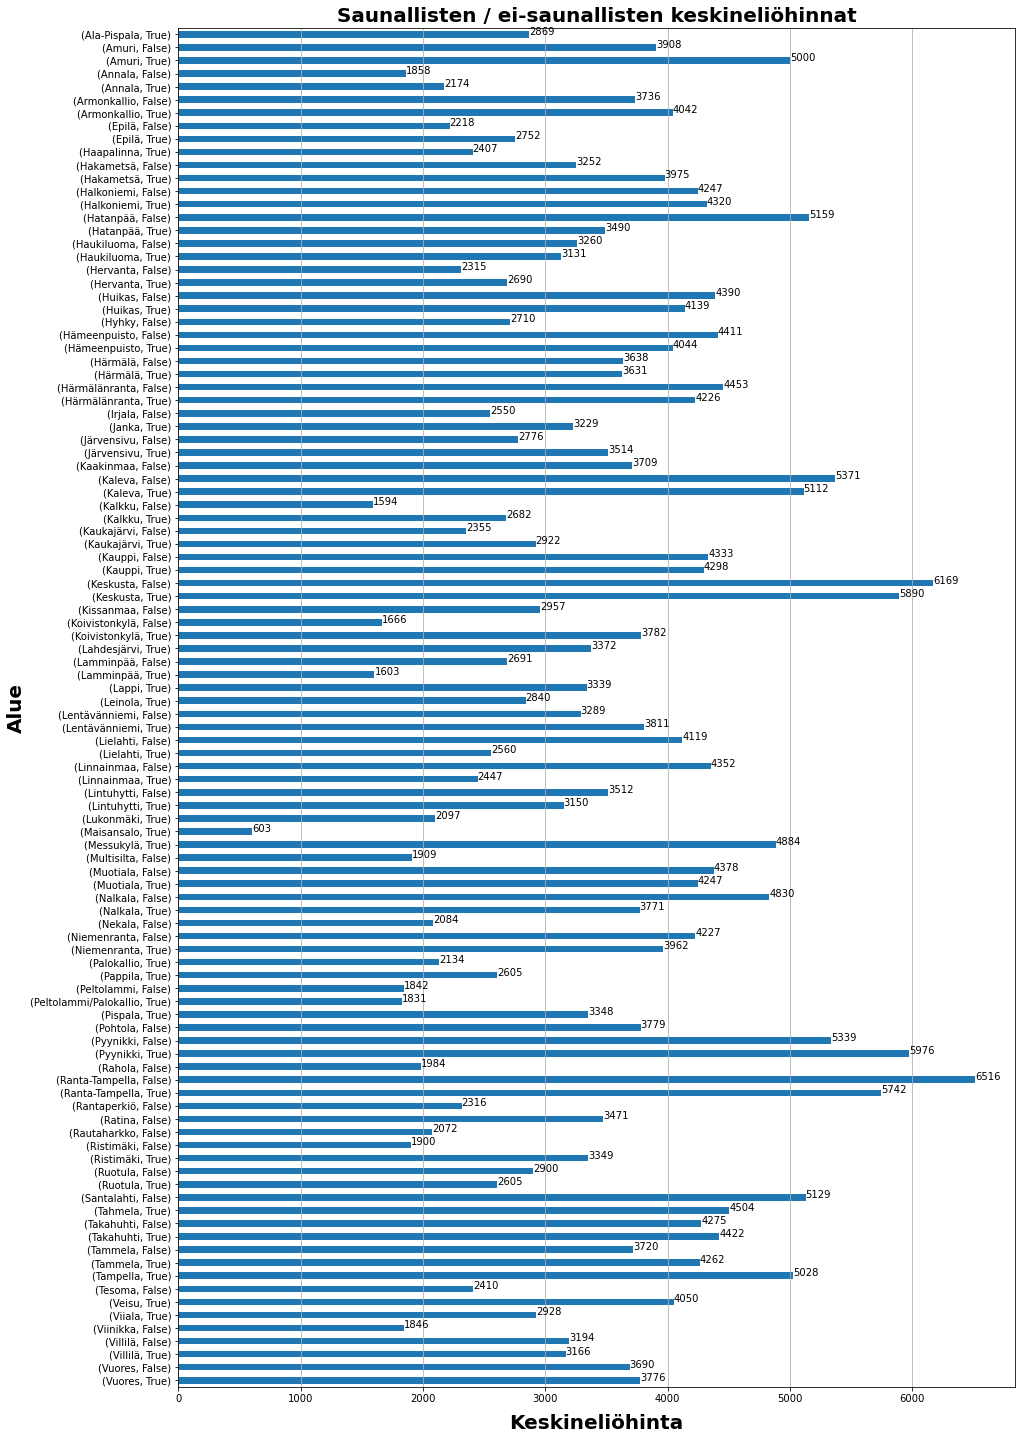

In [14]:
# Visualize average price per square meter in a region depending if there is a sauna in the apartment

avg_per_sq = df.groupby(["Alue", "Sauna"]).mean()
avg_per_sq = avg_per_sq["Neliöhinta"].sort_index(ascending=False)

avg_price_plot = avg_per_sq.plot(kind="barh", figsize=(15, 25))
avg_price_plot.grid(axis='x')

for index, value in enumerate(avg_per_sq):
    label = str(value).split('.')[0]
    plt.text(value, index, label)
    
    
# Set x-axis label
avg_price_plot.set_xlabel("Keskineliöhinta", labelpad=10, weight='bold', size=20)

# Set y-axis label
avg_price_plot.set_ylabel("Alue", weight='bold', size=20)

# Set plot title
plt.title('Saunallisten / ei-saunallisten keskineliöhinnat', weight='bold', size=20)

plt.show()

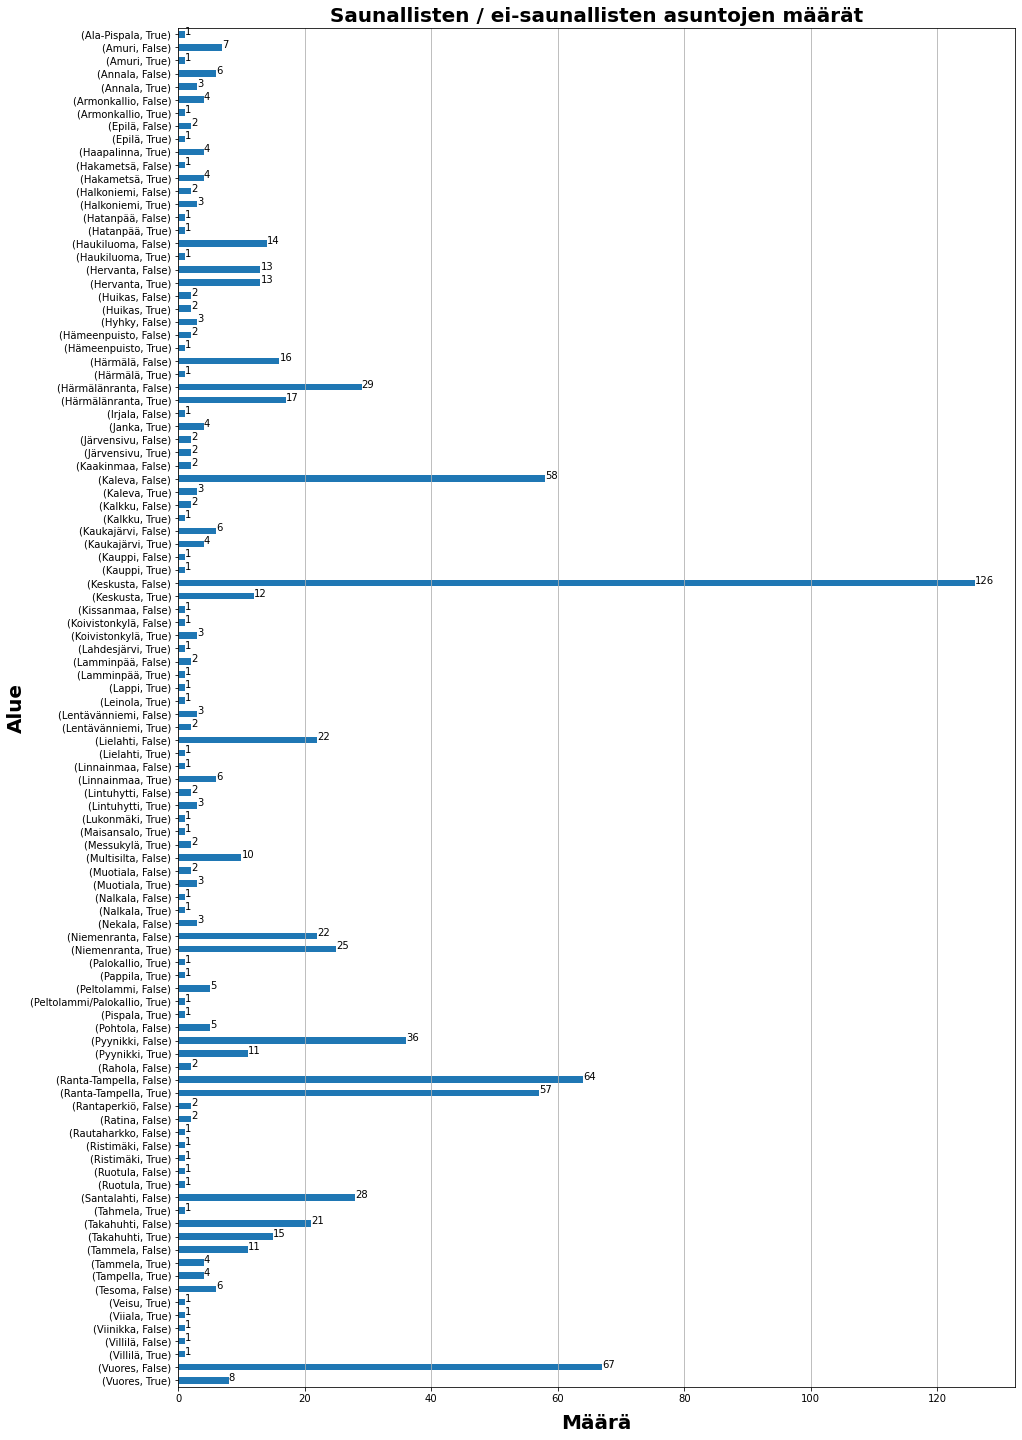

In [15]:
# Visualize average price per square meter in a region depending if there is a sauna in the apartment

avg_per_sq = df.groupby(["Alue", "Sauna"]).count()
avg_per_sq = avg_per_sq["Neliöhinta"].sort_index(ascending=False)

avg_price_plot = avg_per_sq.plot(kind="barh", figsize=(15, 25))
avg_price_plot.grid(axis='x')

for index, value in enumerate(avg_per_sq):
    label = str(value).split('.')[0]
    plt.text(value, index, label)
    
    
# Set x-axis label
avg_price_plot.set_xlabel("Määrä", labelpad=10, weight='bold', size=20)

# Set y-axis label
avg_price_plot.set_ylabel("Alue", weight='bold', size=20)

# Set plot title
plt.title('Saunallisten / ei-saunallisten asuntojen määrät', weight='bold', size=20)

plt.show()

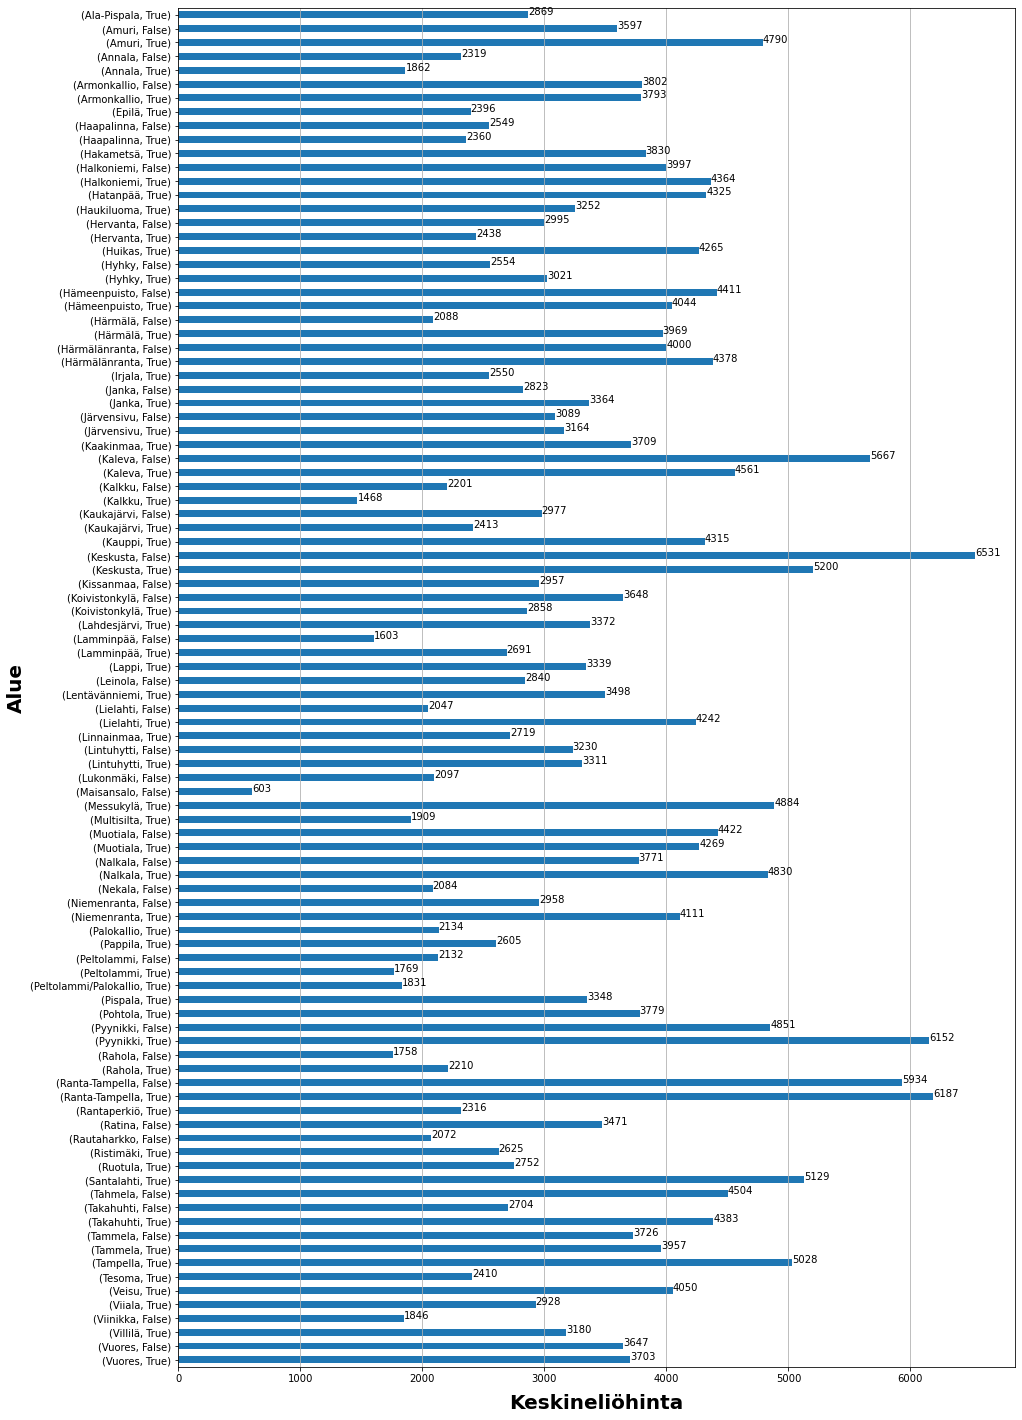

In [16]:
# Visualize average price per square meter in a region depending if there is a balcony in the apartment

avg_per_sq = df.groupby(["Alue", "Parveke"]).mean()
avg_per_sq = avg_per_sq["Neliöhinta"].sort_index(ascending=False)

avg_price_plot = avg_per_sq.plot(kind="barh", figsize=(15, 25))
avg_price_plot.grid(axis='x')

for index, value in enumerate(avg_per_sq):
    label = str(value).split('.')[0]
    plt.text(value, index, label)
    
    
# Set x-axis label
avg_price_plot.set_xlabel("Keskineliöhinta", labelpad=10, weight='bold', size=20)

# Set y-axis label
avg_price_plot.set_ylabel("Alue", weight='bold', size=20)

plt.show()

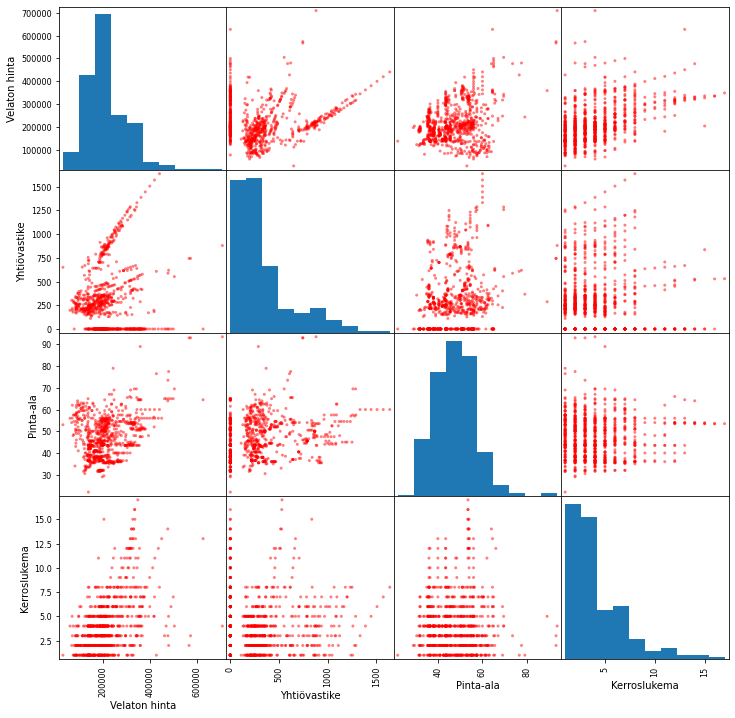

In [17]:
scattercols = ['Velaton hinta','Yhtiövastike', 'Pinta-ala', 'Kerroslukema']
axs = pd.plotting.scatter_matrix(df[scattercols],
                        figsize=(12, 12), c='red')


In [20]:
# Show dataframe and save it to .csv and .xls
display(df)

today = datetime.date.today()
today_str = str(today)
print(ROOT_DIR)
csv_path = os.path.join(os.path.sep, ROOT_DIR +'/JodaAIPlatformEnv/resultfiles'+ os.sep +"apartments_cleaned" + today_str + ".csv")
xls_path = os.path.join(os.path.sep, ROOT_DIR +'/JodaAIPlatformEnv/resultfiles'+ os.sep +"apartments_cleaned" + today_str + ".xlsx")

print(csv_path)

df.to_csv(csv_path, sep=";", encoding='utf-8')
df.to_excel(xls_path, encoding='utf-8')

,Unnamed: 0,URL,Osoite,Alue,Myyntihinta,Velaton hinta,Pinta-ala,Neliöhinta,Rahoitusvastike,Hoitovastike,...,Parveke,Kylpyhuoneen varusteet,Sauna,Taloyhtiössä sauna,Säilytystilat,Näkymät,Tulevat remontit,Tehdyt remontit,Infoteksti,Kerroslukema
0,0,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Uudenkylänkatu 4 A, Hakametsä, Tampere",Hakametsä,160709.62,174000.0,53.5,3252.34,66.61,142.45,...,True,"Pesutilojen kuvaus: Wc-istuin, suihku, pesukon...",False,False,NaN,NaN,Hallituksen korjaussuunnitelman mukaan: 09/201...,1989 E-talon katon vesieristeiden uusinta. 199...,"HUOM!! Nyt vapautumassa kolmannen kerroksen, v...",3.0
1,1,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Yliopistonkatu 46 A, Keskusta, Tampere",Keskusta,168858.62,179900.0,46.5,3868.82,64.88,142.60,...,True,"Kylpyhuone, suihku, suihkuseinä, peilit, kaapi...",False,False,"Kaapistoja, kellarikomero",Ikkunat Yliopistonkadulle,Suunnitellut: Suunnitellut kunnossapito ja muu...,2008 vesikaton saneraus ja porrashuoneisden ku...,Nyt myynnissä loistopaikan koti Sorsapuiston l...,2.0
2,2,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tesomankatu 20 C, Tesoma, Tampere",Tesoma,91000.00,91000.0,58.5,1555.56,140.72,191.81,...,True,"Varustus: pesukoneliitäntä, lattialämmitys, wc...",False,False,"vaatehuone, kellarikomero",NaN,2019-2021 Alkuperäisten 6 kpl huippuimureiden ...,1992 Julkisivuelementtien saumaus 2001 Julkisi...,"Olen valoisa ylimmän kerroksen koti, joka etsi...",3.0
3,3,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Härmälänkatu 23 B, Rantaperkiö, Tampere",Rantaperkiö,75535.67,108000.0,48.0,2250.00,201.60,0.00,...,True,"Varustus: pesukoneliitäntä, wc-istuin, suihku,...",False,False,kellarikomero,NaN,- Huopakaton kunnon seuranta - Energiaselvitys...,"1993 lukot uusittu,1995 vesikatto,bitumi,rappu...",Rantaperkiössä Härmälän rajalla hyväkuntoinen ...,1.0
4,4,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Kuninkaankatu 33, Keskusta, Tampere",Keskusta,185000.00,185000.0,53.0,3490.57,0.00,127.20,...,True,NaN,False,False,NaN,NaN,Vesikatteen uusiminen sisältäen pelti- ja kerm...,"Hissien saneeraus 1989-91, Huopakaton korjaus ...",Ydinkeskustassa viidennen kerroksen kaksio.\nE...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,861,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tiporaitti 9 C, Santalahti, Tampere",Santalahti,61999.44,206500.0,44.0,4693.18,92.14,220.00,...,True,"Pesutilojen kuvaus: Varustus: suihkuseinä, pei...",False,False,"Kuvaus: Kellarivarasto, vaatehuone, kaapistot",NaN,NaN,NaN,MUUTTOVALMIS uuden Santalahden alueen ensimmäi...,3.0
862,862,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tiporaitti 9 C, Santalahti, Tampere",Santalahti,60198.35,199900.0,44.0,4543.18,89.08,202.40,...,True,"Pesutilojen kuvaus: Varustus: suihkuseinä, pei...",False,False,"Kuvaus: Kellarivarasto, vaatehuone, kaapistot",NaN,NaN,NaN,MUUTTOVALMIS uuden Santalahden alueen ensimmäi...,2.0
863,863,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Lintuhytinkatu 7 B 23, Lintuhytti, Tampere",Lintuhytti,53156.45,137000.0,39.0,3512.82,56.55,152.49,...,True,"Kylpyhuone, suihku, peili, allaskaappi, pesuko...",False,False,"Kaapistot, ulkovarasto","pihalle, kadulle",-,-,ENÄÄ KAKSI ASUNTOA MYYMÄTTÄ. KYSY VÄLITTÄJÄLTÄ...,2.0
864,864,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Runkokatu 6, Haukiluoma, Tampere",Haukiluoma,77148.35,85000.0,51.0,1666.67,27.54,207.06,...,True,"KPH: suihku, pesuallas, wc-istuin, peilikaappi...",False,False,"Kaapistot, vaatehuone. Kellarikerroksessa lisä...","pihalle, Avarat näkymät.",Hallituksen selvitys kunnossapitotarpeista vuo...,Yhtiössä on toteutettu seuraavat merkittävimmä...,Hyväpohjainen ja valoisa 3/4 kerroksen asunto....,3.0


/home/jupyter
/home/jupyter/JodaAIPlatformEnv/resultfiles/apartments_cleaned2020-04-25.csv
